In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import astropy.units as u
import sep

from astropy.io import fits
from matplotlib.patches import Ellipse

In [2]:
tension = 1e-9
length = tension * 1e11 * u.parsec
radius = length / (2 * np.pi)
distance = 25 * u.kiloparsec

angularRadius = radius / distance * u.radian

lmcFits = "/home/adriansh/work/data/stringScratch/fits/decam/c4d_200124_054457_ooi_r_v1_extn=39_POS=80.89166667,-69.7_SIZE=1,1.fits"
# lmcFits = "/home/a/adriansh/analysis/stringScratch/fits/c4d_200124_054457_ooi_r_v1_extn=39_POS=80.89166667,-69.7_SIZE=1,1.fits"
hdul = fits.open(lmcFits)
hdr = hdul[0].header
data = hdul[0].data

blancoPlateScale = hdr["PIXSCAL1"] * u.arcsec / u.pixel
blancoGain = hdr["ARAWGAIN"] * u.electron / u.adu

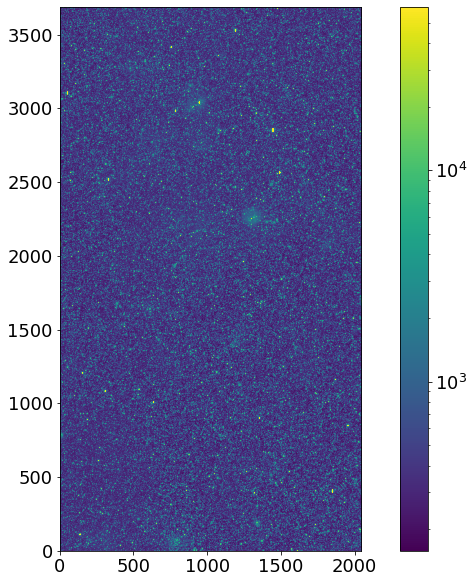

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
imdata = data
norm = matplotlib.colors.LogNorm(imdata.min(), imdata.max())

im = ax.imshow(imdata, origin='lower', interpolation='None', norm=norm)
ax.tick_params(labelsize=18)

cbar = fig.colorbar(im, ax=ax, orientation='vertical')
cbar.ax.tick_params(labelsize=18)

plt.show(fig)

In [4]:
# measure a spatially varying background on the image
data = data.byteswap().newbyteorder()
bkg = sep.Background(data)

In [5]:
# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)

351.48046875
111.38184356689453


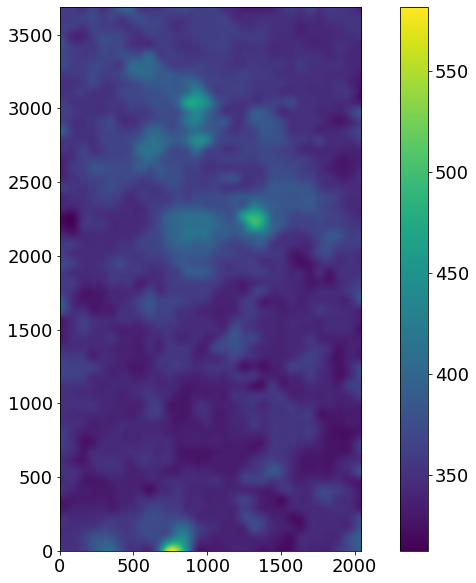

In [6]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()
# show the background
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
imdata = bkg_image

im = ax.imshow(imdata, origin='lower', interpolation='None')
ax.tick_params(labelsize=18)

cbar = fig.colorbar(im, ax=ax, orientation='vertical')
cbar.ax.tick_params(labelsize=18)

plt.show(fig)

In [11]:
bkg_corrected = data - bkg_image

-266.57455 58901.55


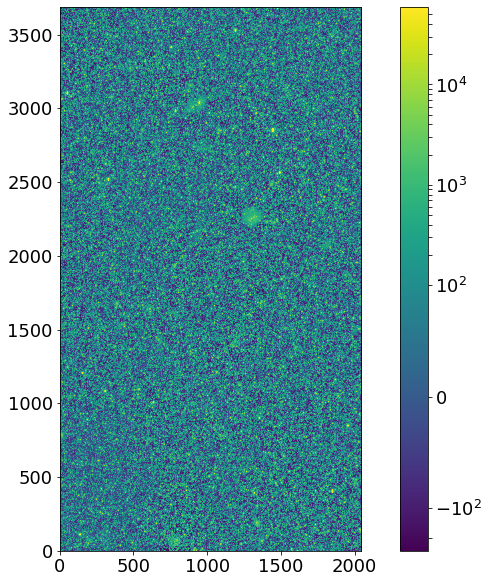

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
imdata = bkg_corrected
norm = matplotlib.colors.SymLogNorm(100, vmin=imdata.min(),
                                    vmax=imdata.max(), base=10)

im = ax.imshow(imdata, origin='lower', interpolation='None', norm=norm)
ax.tick_params(labelsize=18)

cbar = fig.colorbar(im, ax=ax, orientation='vertical')
cbar.ax.tick_params(labelsize=18)

plt.show(fig)

In [23]:
objects = sep.extract(bkg_corrected, 50, err=bkg.globalrms)
print(len(objects))

1509


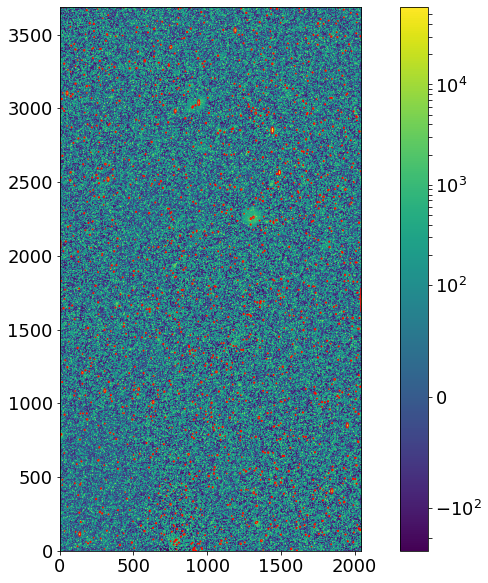

In [24]:
# plot background-subtracted image
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
imdata = bkg_corrected
norm = matplotlib.colors.SymLogNorm(100, vmin=imdata.min(),
                                    vmax=imdata.max(), base=10)

im = ax.imshow(imdata, origin='lower', interpolation='None', norm=norm)
ax.tick_params(labelsize=18)

cbar = fig.colorbar(im, ax=ax, orientation='vertical')
cbar.ax.tick_params(labelsize=18)

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.show(fig)